In [2]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, average_precision_score, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline



In [3]:
# Load the dataset
try:
    df = pd.read_csv('/content/sample_data/creditcard.csv')
    print("Dataset 'creditcard.csv' loaded successfully.")
except FileNotFoundError:
    print("Error: 'creditcard.csv' not found.")
    exit() # Exit if the file isn't found

Dataset 'creditcard.csv' loaded successfully.


In [4]:
# Display the first few rows of the dataset
print("\n--- First 5 rows of the dataset ---")
print(df.head())


--- First 5 rows of the dataset ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010

In [5]:
# Display general information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# Class distribution
print("\nClass Distribution (0: Non-Fraud, 1: Fraud):")
print(df['Class'].value_counts())
print("\nClass Distribution (Percentage):")
print(df['Class'].value_counts(normalize=True) * 100)


Class Distribution (0: Non-Fraud, 1: Fraud):
Class
0    284315
1       492
Name: count, dtype: int64

Class Distribution (Percentage):
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


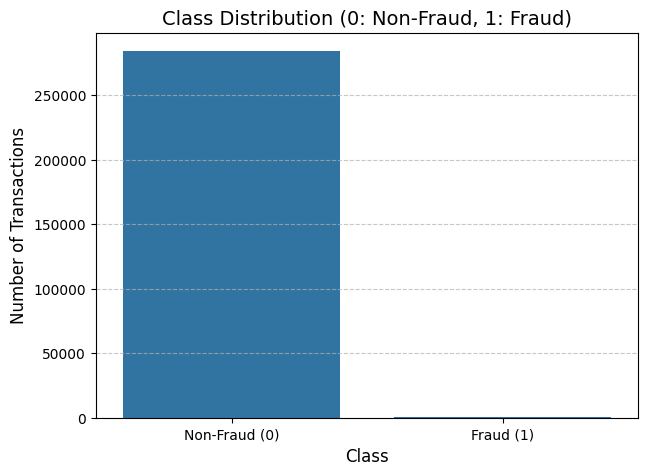

In [8]:
# Visualize class distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Fraud (0)', 'Fraud (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

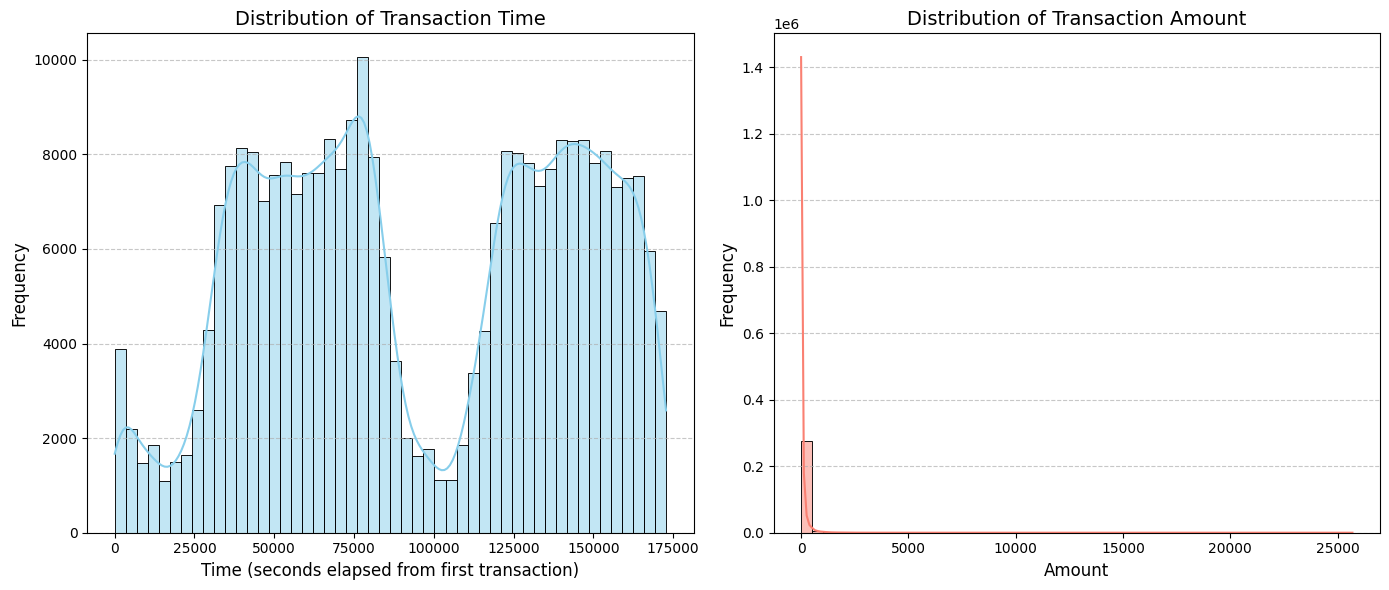

In [9]:
# Distribution of 'Time' and 'Amount' features
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Time'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlabel('Time (seconds elapsed from first transaction)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.histplot(df['Amount'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-11-c28a18495db1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, showfliers=False, palette='viridis') # showfliers=False to remove extreme outliers for clearer visualization of the bulk


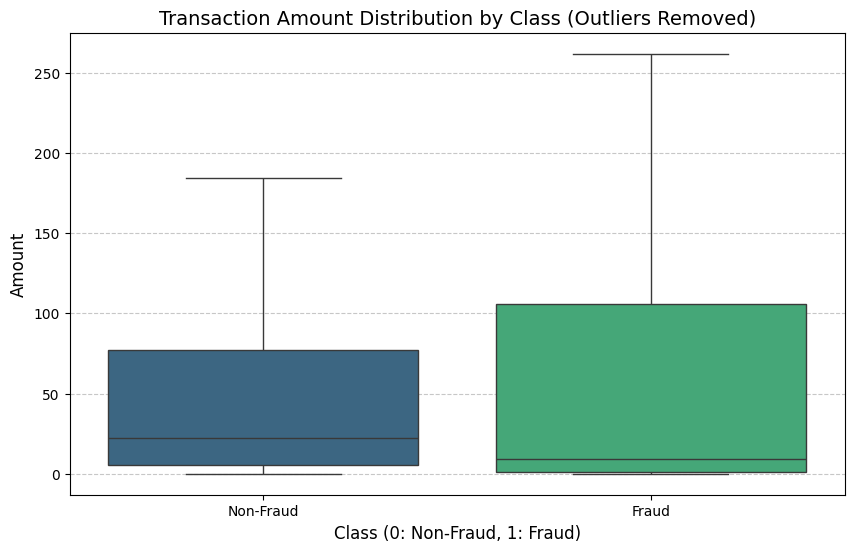

In [11]:
# Examine 'Amount' for fraudulent vs. non-fraudulent transactions using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df, showfliers=False, palette='viridis') # showfliers=False to remove extreme outliers for clearer visualization of the bulk
plt.title('Transaction Amount Distribution by Class (Outliers Removed)', fontsize=14)
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


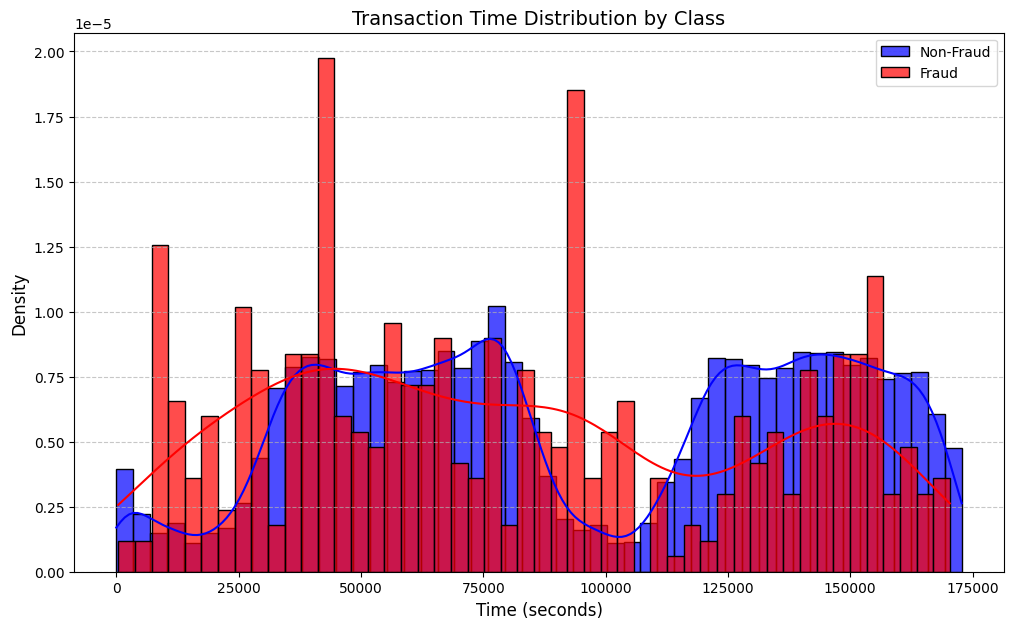

In [12]:
# Examine 'Time' for fraudulent vs. non-fraudulent transactions using histograms
plt.figure(figsize=(12, 7))
sns.histplot(df[df['Class'] == 0]['Time'], color='blue', bins=50, kde=True, label='Non-Fraud', alpha=0.7, stat='density')
sns.histplot(df[df['Class'] == 1]['Time'], color='red', bins=50, kde=True, label='Fraud', alpha=0.7, stat='density')
plt.title('Transaction Time Distribution by Class', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

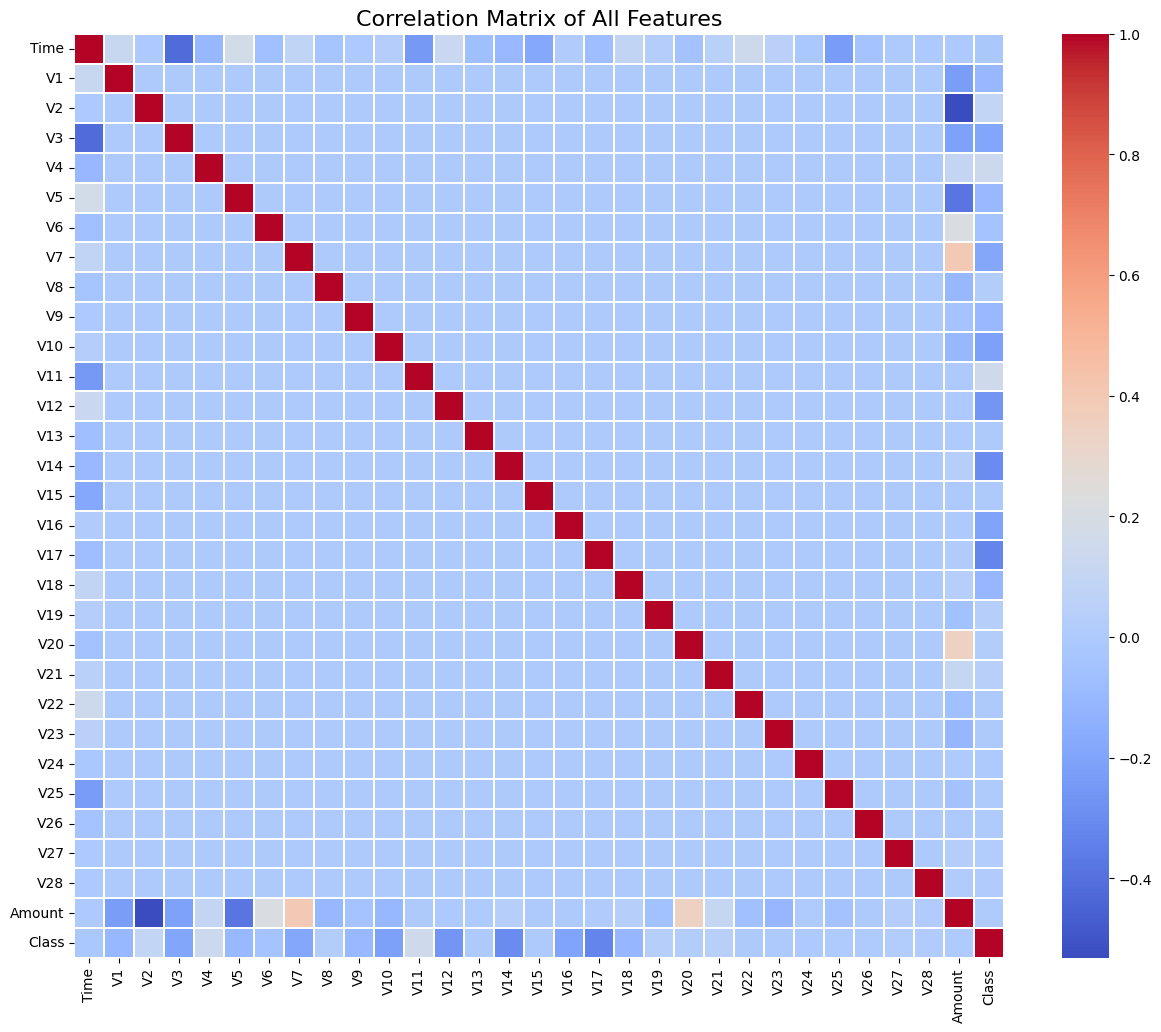

In [14]:
# Calculate correlation matrix only for numerical columns
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.show()

In [15]:
# Focus on correlations with the 'Class' variable
print("\nCorrelation of features with the 'Class' variable (target):")
print(corr_matrix['Class'].sort_values(ascending=False))
print("\nObservation: Some 'V' features (e.g., V17, V14, V12, V10, V3) show stronger negative correlations with Class, while others (V4, V11, V2, V19) show positive correlations. This indicates their importance in distinguishing fraud.")


Correlation of features with the 'Class' variable (target):
Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

Observation: Some 'V' features (e.g., V17, V14, V12, V10, V3) show stronger negative correlations with Class, while others (V4, V11, V2, V19) show positive correlations. This indicates their importance in distinguishing fraud.


In [16]:
# Separate features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']
print(f"Original X shape: {X.shape}, y shape: {y.shape}")

Original X shape: (284807, 30), y shape: (284807,)


In [17]:
# Scale 'Time' and 'Amount' features
scaler = StandardScaler()
X['Time'] = scaler.fit_transform(X[['Time']])
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [18]:
print("\nFeatures after scaling Time and Amount:")
print(X.head())


Features after scaling Time and Amount:
       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V20       V21       V22       V23  \
0  0.239599  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474   
1 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288   
2  0.791461  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412   
3  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321   
4  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458   

        V24       V25      

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
print(f"\nTraining set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set shape: X_test {X_test.shape}, y_test {y_test.shape}")
print("\nTraining set class distribution (percentage):")
print(y_train.value_counts(normalize=True) * 100)
print("\nTest set class distribution (percentage):")
print(y_test.value_counts(normalize=True) * 100)


Training set shape: X_train (227845, 30), y_train (227845,)
Test set shape: X_test (56962, 30), y_test (56962,)

Training set class distribution (percentage):
Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64

Test set class distribution (percentage):
Class
0    99.827955
1     0.172045
Name: proportion, dtype: float64


In [22]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluates a given model and prints classification report, confusion matrix,
    AUPRC, and ROC AUC, along with their respective plots.
    """
    y_pred = model.predict(X_test)
    # Check if the model has predict_proba attribute (for probability-based metrics)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"\n--- {model_name} Performance ---")
    print("Confusion Matrix:")
    # Ensure correct display order for confusion matrix (TN, FP, FN, TP)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
                yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
    plt.title(f'Confusion Matrix for {model_name}', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.show()
    print(f"True Negatives (TN): {cm[0,0]}, False Positives (FP): {cm[0,1]}")
    print(f"False Negatives (FN): {cm[1,0]}, True Positives (TP): {cm[1,1]}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    if y_pred_proba is not None:
        # Precision-Recall Curve and AUPRC
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        auprc = average_precision_score(y_test, y_pred_proba)
        print(f"Area Under the Precision-Recall Curve (AUPRC): {auprc:.4f}")

        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, label=f'{model_name} (AUPRC = {auprc:.2f})', color='darkorange')
        plt.xlabel('Recall', fontsize=12)
        plt.ylabel('Precision', fontsize=12)
        plt.title(f'Precision-Recall Curve for {model_name}', fontsize=14)
        plt.legend(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

        # ROC Curve and ROC AUC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC AUC: {roc_auc:.4f}")

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (ROC AUC = {roc_auc:.2f})', color='darkgreen')
        plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # Diagonal line for random classifier
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}', fontsize=14)
        plt.legend(fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("Model does not have 'predict_proba' method. AUPRC and ROC AUC plots skipped.")

    return y_pred, y_pred_proba


--- Training Logistic Regression Model with class_weight='balanced' ---

--- Logistic Regression Performance ---
Confusion Matrix:


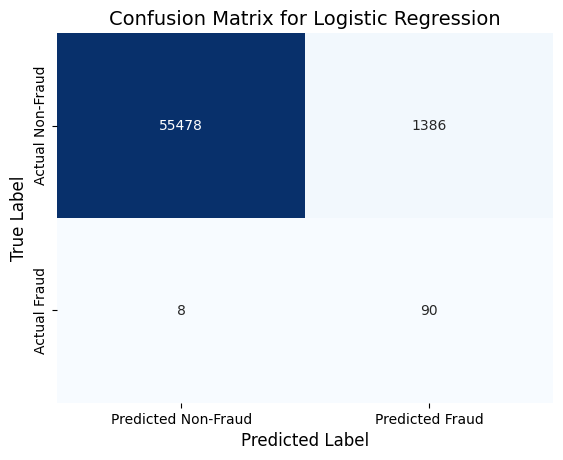

True Negatives (TN): 55478, False Positives (FP): 1386
False Negatives (FN): 8, True Positives (TP): 90

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Area Under the Precision-Recall Curve (AUPRC): 0.7189


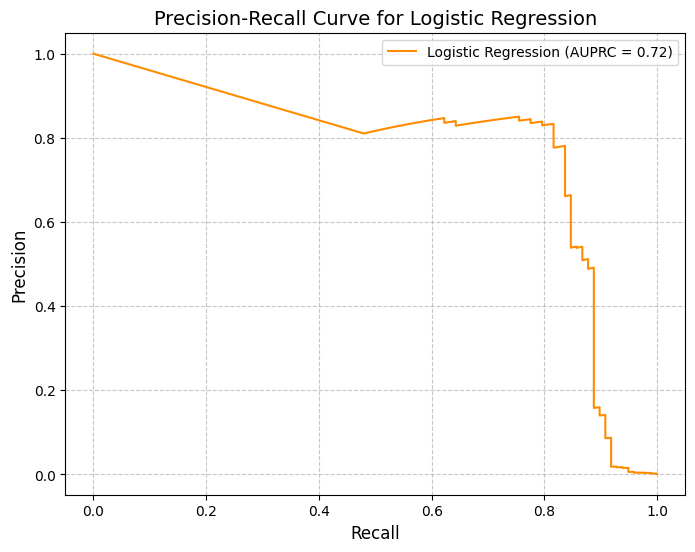

ROC AUC: 0.9721


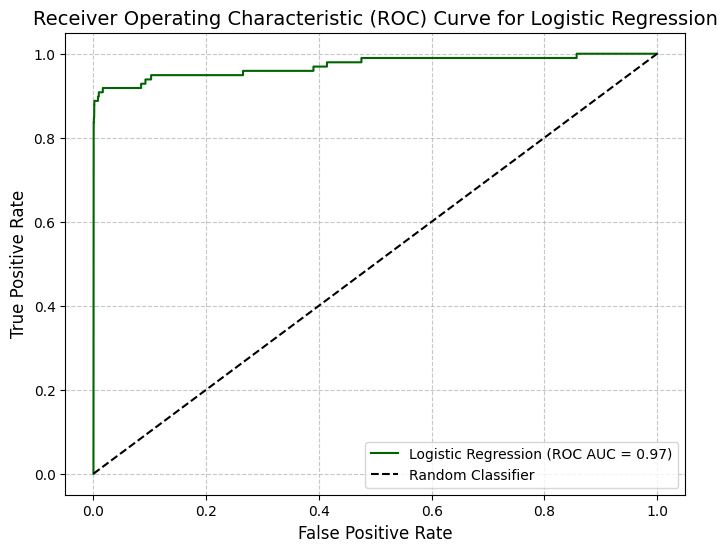

In [23]:
print("\n--- Training Logistic Regression Model with class_weight='balanced' ---")
# Using 'liblinear' solver for small datasets and L1/L2 regularization
lr_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_y_pred, lr_y_pred_proba = evaluate_model(lr_model, X_test, y_test, "Logistic Regression")


--- Training Random Forest Classifier with class_weight='balanced' ---

--- Random Forest Classifier Performance ---
Confusion Matrix:


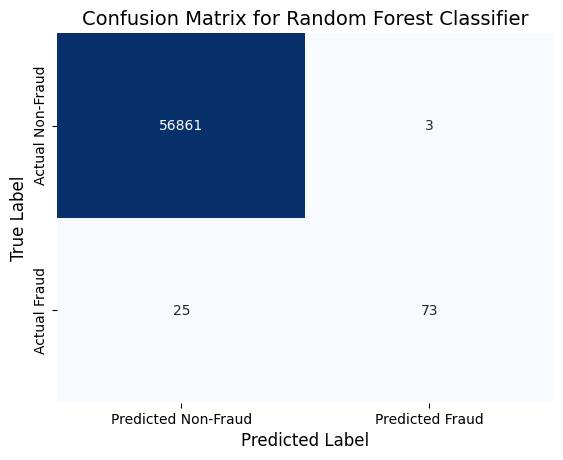

True Negatives (TN): 56861, False Positives (FP): 3
False Negatives (FN): 25, True Positives (TP): 73

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Area Under the Precision-Recall Curve (AUPRC): 0.8542


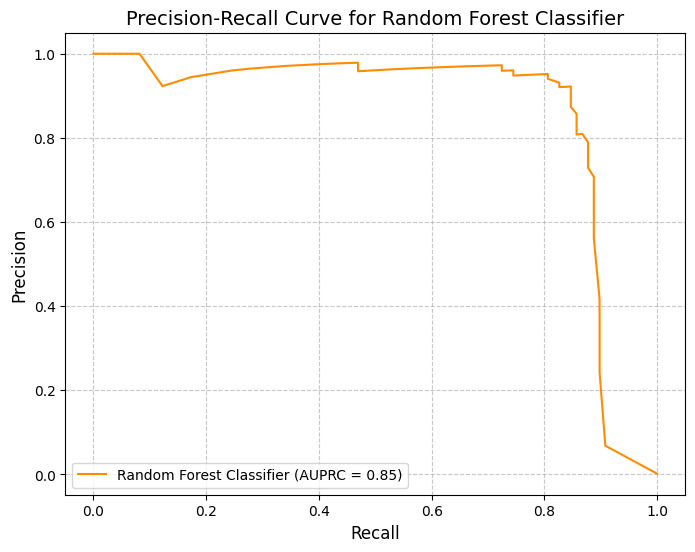

ROC AUC: 0.9529


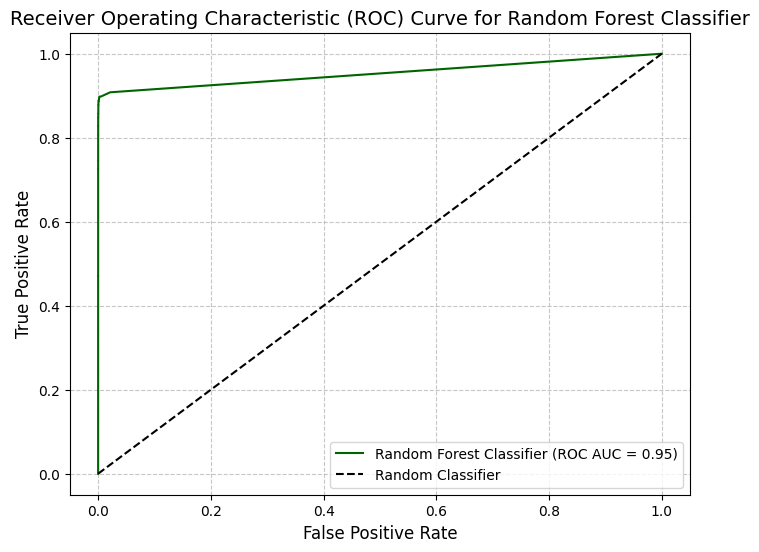

In [24]:
print("\n--- Training Random Forest Classifier with class_weight='balanced' ---")
# n_jobs=-1 uses all available processors
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_y_pred, rf_y_pred_proba = evaluate_model(rf_model, X_test, y_test, "Random Forest Classifier")


--- Training Gradient Boosting Classifier ---

--- Gradient Boosting Classifier Performance ---
Confusion Matrix:


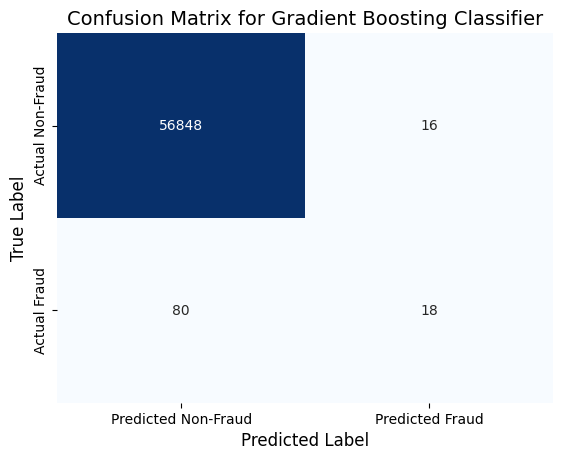

True Negatives (TN): 56848, False Positives (FP): 16
False Negatives (FN): 80, True Positives (TP): 18

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.53      0.18      0.27        98

    accuracy                           1.00     56962
   macro avg       0.76      0.59      0.64     56962
weighted avg       1.00      1.00      1.00     56962

Area Under the Precision-Recall Curve (AUPRC): 0.1567


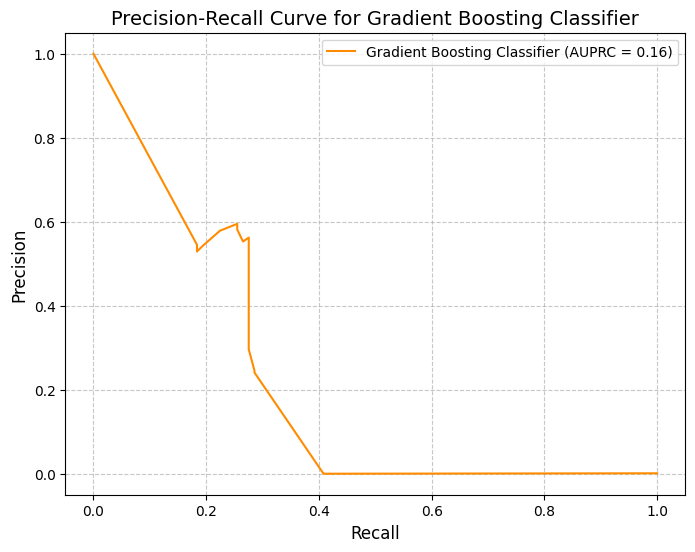

ROC AUC: 0.3469


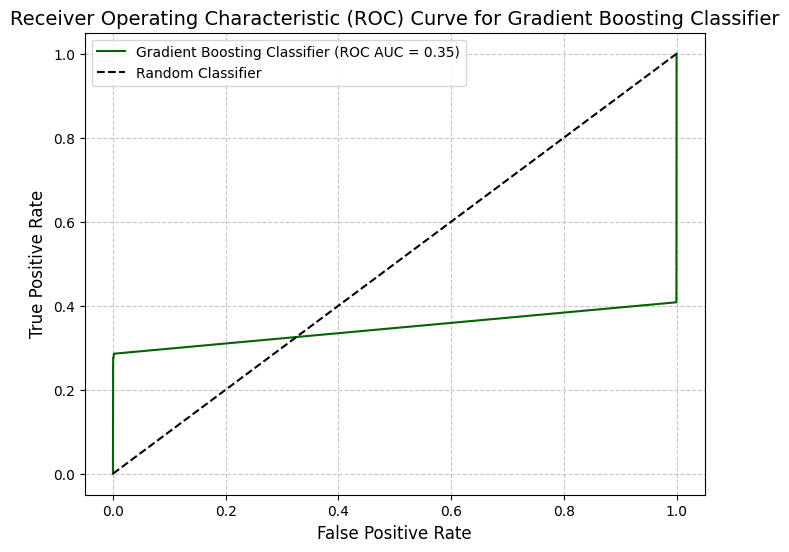

In [26]:
print("\n--- Training Gradient Boosting Classifier ---")
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred, gb_y_pred_proba = evaluate_model(gb_model, X_test, y_test, "Gradient Boosting Classifier")



Training Logistic Regression with SMOTE...

--- Logistic Regression (SMOTE) Performance ---
Confusion Matrix:


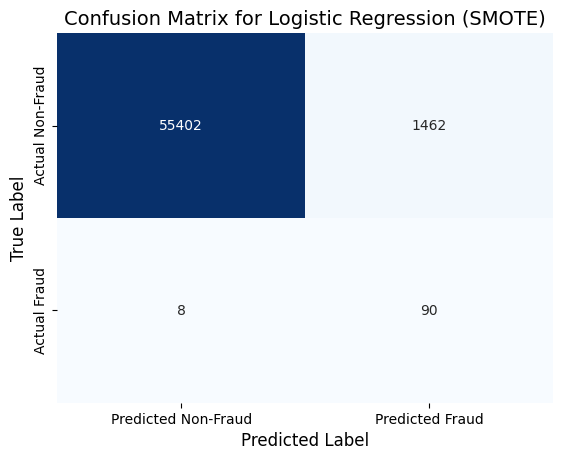

True Negatives (TN): 55402, False Positives (FP): 1462
False Negatives (FN): 8, True Positives (TP): 90

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

Area Under the Precision-Recall Curve (AUPRC): 0.7252


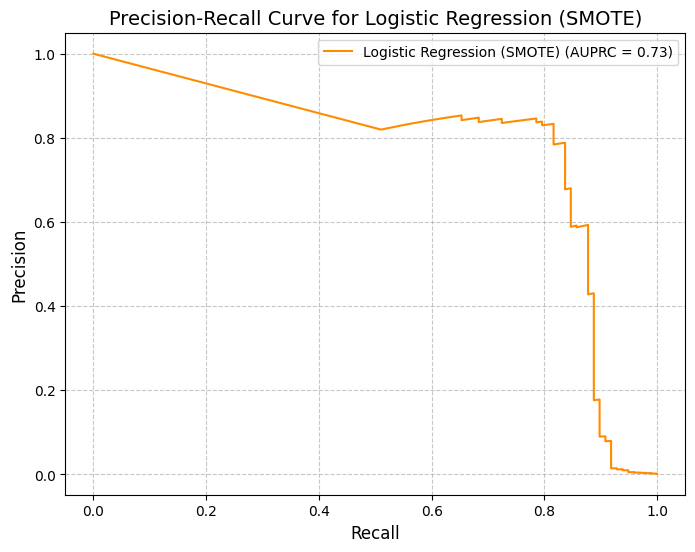

ROC AUC: 0.9699


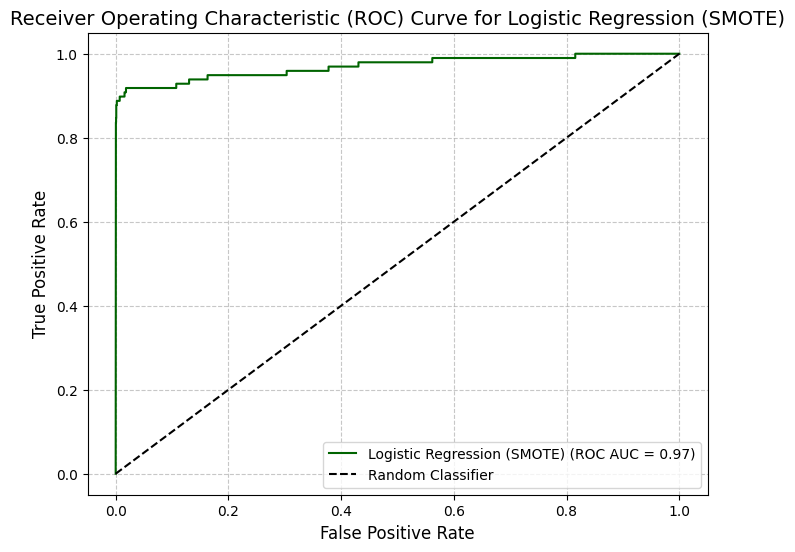


Training Random Forest with SMOTE...

--- Random Forest (SMOTE) Performance ---
Confusion Matrix:


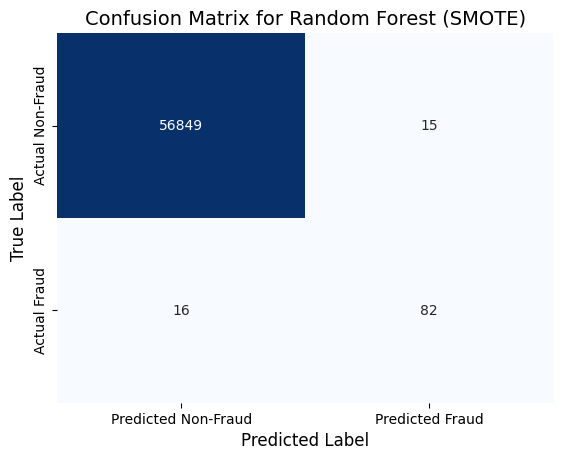

True Negatives (TN): 56849, False Positives (FP): 15
False Negatives (FN): 16, True Positives (TP): 82

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Area Under the Precision-Recall Curve (AUPRC): 0.8747


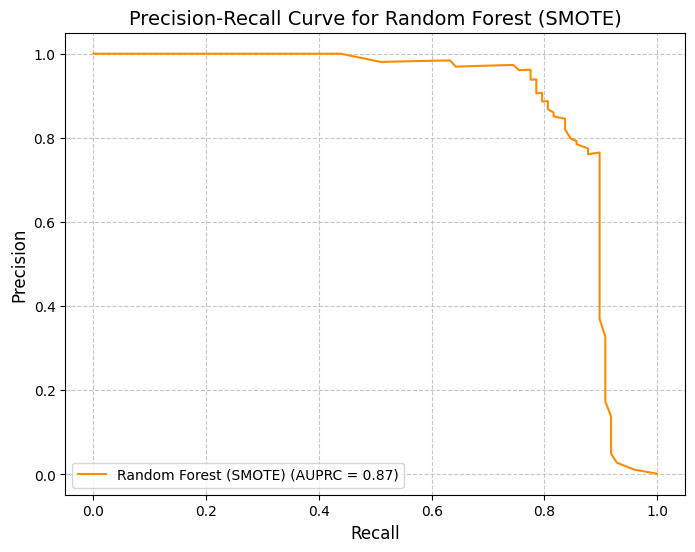

ROC AUC: 0.9731


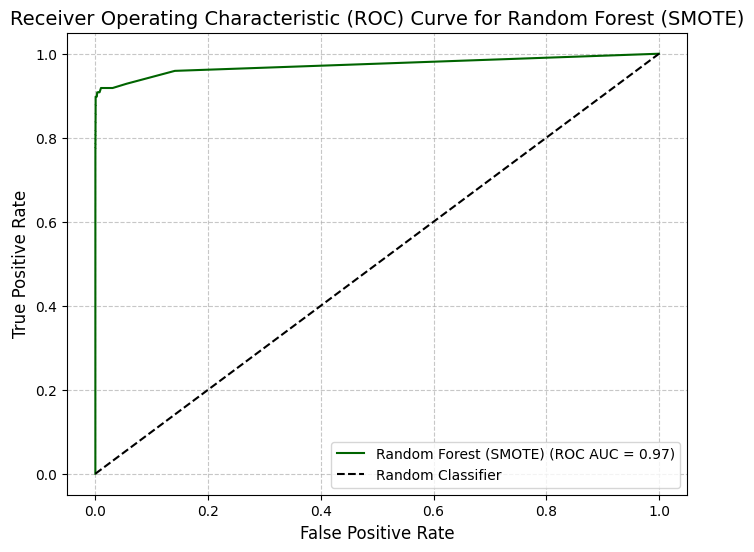


Training Gradient Boosting with SMOTE...

--- Gradient Boosting (SMOTE) Performance ---
Confusion Matrix:


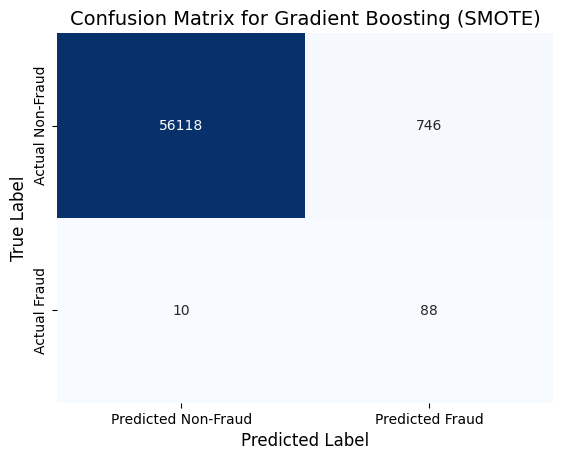

True Negatives (TN): 56118, False Positives (FP): 746
False Negatives (FN): 10, True Positives (TP): 88

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.90      0.19        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Area Under the Precision-Recall Curve (AUPRC): 0.6885


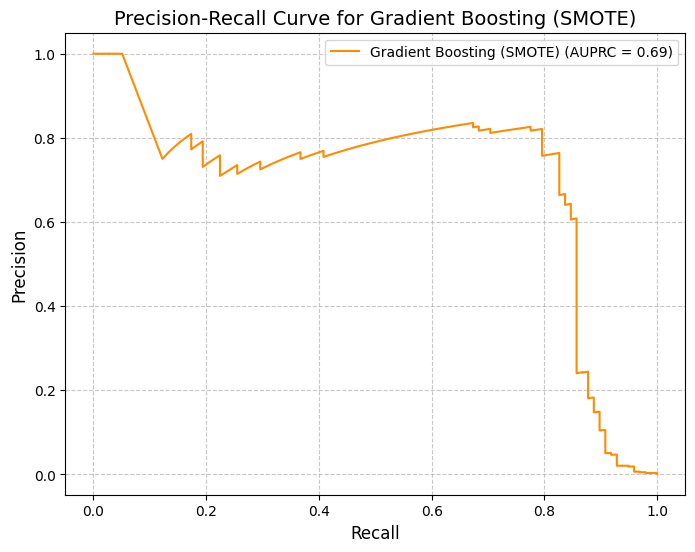

ROC AUC: 0.9807


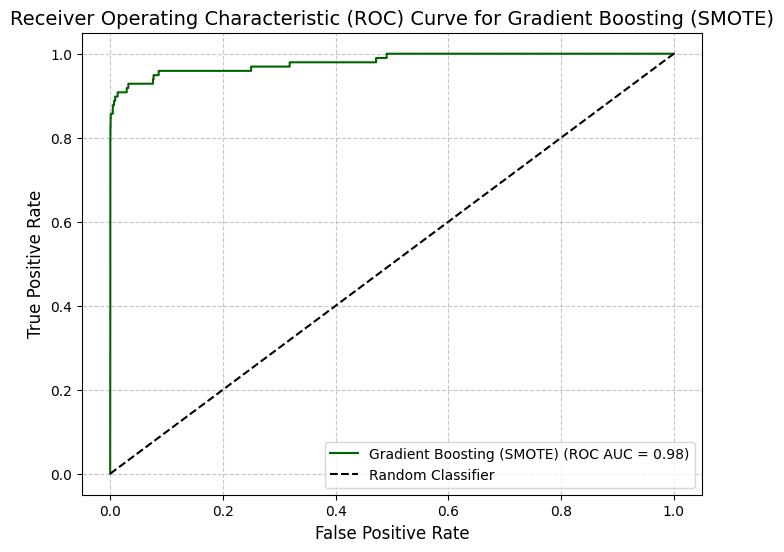

In [27]:
# Define the SMOTE sampler
smote = SMOTE(random_state=42)

# Create pipelines for each model with SMOTE
# The 'classifier' step will use the default parameters unless specified.

# Logistic Regression with SMOTE
pipeline_lr_smote = Pipeline([('smote', smote),
                              ('classifier', LogisticRegression(solver='liblinear', random_state=42, max_iter=1000))])
print("\nTraining Logistic Regression with SMOTE...")
pipeline_lr_smote.fit(X_train, y_train)
smote_lr_y_pred, smote_lr_y_pred_proba = evaluate_model(pipeline_lr_smote, X_test, y_test, "Logistic Regression (SMOTE)")

# Random Forest with SMOTE
pipeline_rf_smote = Pipeline([('smote', smote),
                              ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])
print("\nTraining Random Forest with SMOTE...")
pipeline_rf_smote.fit(X_train, y_train)
smote_rf_y_pred, smote_rf_y_pred_proba = evaluate_model(pipeline_rf_smote, X_test, y_test, "Random Forest (SMOTE)")

# Gradient Boosting with SMOTE
pipeline_gb_smote = Pipeline([('smote', smote),
                              ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))])
print("\nTraining Gradient Boosting with SMOTE...")
pipeline_gb_smote.fit(X_train, y_train)
smote_gb_y_pred, smote_gb_y_pred_proba = evaluate_model(pipeline_gb_smote, X_test, y_test, "Gradient Boosting (SMOTE)")


--- Starting Hyperparameter Tuning with GridSearchCV (Random Forest with SMOTE) ---
Tuning hyperparameters to find the optimal configuration for better performance.
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Best parameters for Tuned Random Forest (SMOTE): {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 200}
Best AUPRC score on training data (cross-validation): 0.8397

--- Tuned Random Forest (SMOTE) Performance ---
Confusion Matrix:


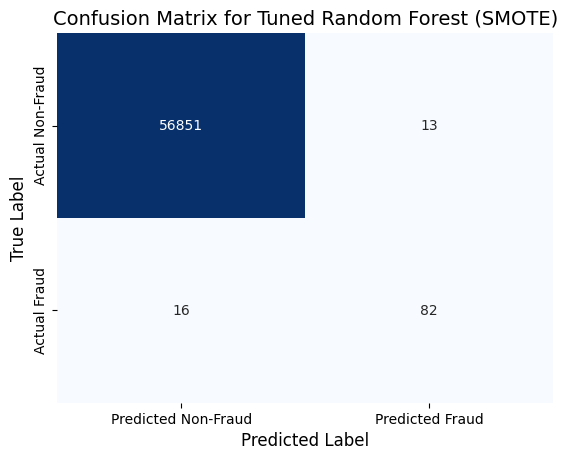

True Negatives (TN): 56851, False Positives (FP): 13
False Negatives (FN): 16, True Positives (TP): 82

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Area Under the Precision-Recall Curve (AUPRC): 0.8749


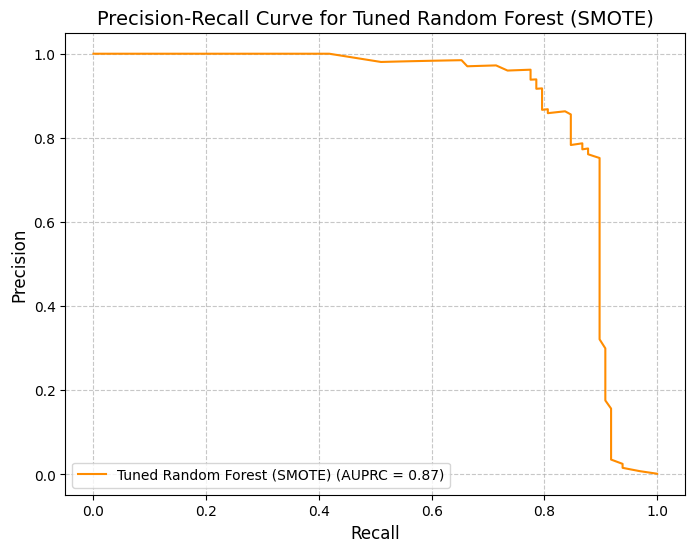

ROC AUC: 0.9754


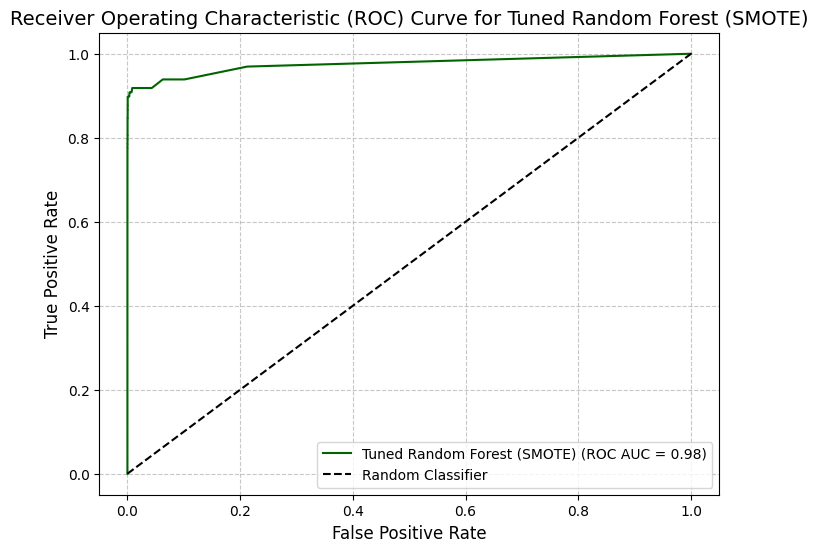

In [28]:
print("\n--- Starting Hyperparameter Tuning with GridSearchCV (Random Forest with SMOTE) ---")
print("Tuning hyperparameters to find the optimal configuration for better performance.")

param_grid = {
    'classifier__n_estimators': [50, 100, 200], # Number of trees in the forest
    'classifier__max_depth': [10, 20, None],   # Maximum depth of the tree (None means unlimited)
    'classifier__min_samples_leaf': [1, 5]     # Minimum number of samples required to be at a leaf node
}

# Create a StratifiedKFold for cross-validation to maintain class distribution within folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=pipeline_rf_smote, # Use the pipeline with SMOTE
                              param_grid=param_grid,
                              scoring='average_precision', # Optimize for AUPRC, crucial for imbalanced data
                              cv=cv,                       # Cross-validation strategy
                              n_jobs=-1,                   # Use all available CPU cores
                              verbose=2)                   # Show progress

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

print(f"\nBest parameters for Tuned Random Forest (SMOTE): {grid_search_rf.best_params_}")
print(f"Best AUPRC score on training data (cross-validation): {grid_search_rf.best_score_:.4f}")

# Evaluate the best model found by GridSearchCV on the test set
best_rf_model = grid_search_rf.best_estimator_
tuned_rf_y_pred, tuned_rf_y_pred_proba = evaluate_model(best_rf_model, X_test, y_test, "Tuned Random Forest (SMOTE)")